In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sklearn
sklearn.__version__

'0.21.3'

### Generating data for KNN
- general values for class 0
   - general x1 values within the range 0 to 50
   - general x2 values within the range 1 to 50
   - create a 2d array with x1 values as 0 th element and x2 values as 1st element 3rd value is zero
   - o/p[[2,5,0],[3,10,0][24,12,0]
- Genernal values for class 1
   - general x1 values within the range 50 to 100
   - general x2 values within the range 1 to 50
   - create a 2d array with x1 values as 0 the element and x2 values as 1st element 3rd element is one
- create  a 2d array wich consists of both classes data
- create a dataframe from this data with added column

In [4]:
np.random.seed(10)
x1 =np.random.randint(0,50,50)
x2 =np.random.randint(1,50,50)
x1,x2

(array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
        16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
        22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11]),
 array([29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21,
        33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22,
        43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41]))

o/p --[[9,29],[36,11],....[11,41]]

In [5]:
x1_2d = np.expand_dims(x1,1)
x2_2d = np.expand_dims(x2,1)
y_2d = np.expand_dims(np.zeros(50,dtype=int),1)

In [6]:
np.vstack((x1,x2))

array([[ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40,
        36, 16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25,
        13, 28, 22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23,
        30, 11],
       [29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34,
        21, 33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,
         7, 22, 43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34,
        46, 41]])

In [7]:
d0=np.hstack((x1_2d,x2_2d,y_2d))
d0

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [8]:
np.hstack((x1,x2))

array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
       16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
       22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11, 29,
       11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21, 33,
       25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22, 43,
       23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41])

In [9]:
np.random.seed(15)
x1 =np.random.randint(50,100,50)
x2 =np.random.randint(1,50,50)
x1_2d = np.expand_dims(x1,1)
x2_2d = np.expand_dims(x2,1)
y_2d = np.expand_dims(np.ones(50,dtype=int),1)
d1=np.hstack((x1_2d,x2_2d,y_2d))
d1

array([[58,  3,  1],
       [62, 43,  1],
       [55, 33,  1],
       [50, 38,  1],
       [78,  8,  1],
       [77, 25,  1],
       [57, 38,  1],
       [61, 46,  1],
       [71, 20,  1],
       [97, 49,  1],
       [79, 41,  1],
       [67, 30,  1],
       [95, 13,  1],
       [81, 25,  1],
       [73, 47,  1],
       [82, 13,  1],
       [60, 34,  1],
       [65,  3,  1],
       [54, 25,  1],
       [91, 45,  1],
       [89, 43,  1],
       [87, 18,  1],
       [69, 24,  1],
       [94, 30,  1],
       [63, 35,  1],
       [79, 24,  1],
       [65, 19,  1],
       [88, 27,  1],
       [65, 27,  1],
       [99, 17,  1],
       [51, 14,  1],
       [81, 27,  1],
       [82, 33,  1],
       [71,  7,  1],
       [76,  5,  1],
       [84, 29,  1],
       [61, 21,  1],
       [51, 36,  1],
       [90, 40,  1],
       [56, 29,  1],
       [91,  6,  1],
       [84,  1,  1],
       [90, 10,  1],
       [72, 49,  1],
       [90, 21,  1],
       [65, 47,  1],
       [78, 39,  1],
       [85, 3

In [10]:
d0

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [11]:
d1

array([[58,  3,  1],
       [62, 43,  1],
       [55, 33,  1],
       [50, 38,  1],
       [78,  8,  1],
       [77, 25,  1],
       [57, 38,  1],
       [61, 46,  1],
       [71, 20,  1],
       [97, 49,  1],
       [79, 41,  1],
       [67, 30,  1],
       [95, 13,  1],
       [81, 25,  1],
       [73, 47,  1],
       [82, 13,  1],
       [60, 34,  1],
       [65,  3,  1],
       [54, 25,  1],
       [91, 45,  1],
       [89, 43,  1],
       [87, 18,  1],
       [69, 24,  1],
       [94, 30,  1],
       [63, 35,  1],
       [79, 24,  1],
       [65, 19,  1],
       [88, 27,  1],
       [65, 27,  1],
       [99, 17,  1],
       [51, 14,  1],
       [81, 27,  1],
       [82, 33,  1],
       [71,  7,  1],
       [76,  5,  1],
       [84, 29,  1],
       [61, 21,  1],
       [51, 36,  1],
       [90, 40,  1],
       [56, 29,  1],
       [91,  6,  1],
       [84,  1,  1],
       [90, 10,  1],
       [72, 49,  1],
       [90, 21,  1],
       [65, 47,  1],
       [78, 39,  1],
       [85, 3

In [12]:
data = np.vstack((d0,d1))
data

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [41]:
df = pd.DataFrame(data,columns=["x1","x2","y"])
df.head()

,x1,x2,y
0,9,29,0
1,36,11,0
2,15,25,0
3,0,10,0
4,49,16,0


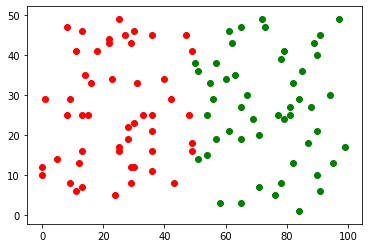

In [14]:
plt.scatter(df["x1"][:50],df["x2"][:50],color="r")
plt.scatter(df["x1"][50:],df["x2"][50:],color="g")

In [15]:
df["x2"][:50]

0     29
1     11
2     25
3     10
4     16
5     19
6     17
7      8
8     25
9     12
10    18
11    47
12     8
13    12
14    29
15    34
16    21
17    33
18    25
19    45
20     6
21     5
22     8
23    25
24    25
25    45
26    35
27    41
28    16
29    14
30    25
31    16
32     7
33    22
34    43
35    23
36    12
37    49
38    13
39    29
40    33
41    16
42    45
43    41
44    43
45    46
46    44
47    34
48    46
49    41
Name: x2, dtype: int32

seperated the features and outcomes

In [16]:
outcome = df["y"]
features = df[["x1","x2"]]
# features =df.drop("y",axis=1)
outcome[0],features.iloc[0]

(0, x1     9
 x2    29
 Name: 0, dtype: int32)

In [17]:
features

,x1,x2
0,9,29
1,36,11
2,15,25
3,0,10
4,49,16
...,...,...
95,65,47
96,78,39
97,85,36
98,54,15


In [18]:
import math

In [19]:
def Eucledian_distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 )

In [20]:
Eucledian_distance((4,3),(0,0))

5.0

In [21]:
def knearest_points(p,d):
    """p - new data point
    d-all the features as numpy array
    k- no.of neighbors
    return the k nearest neighbors"""
    # create a an empty list to store distances
    distances = []
    for row in d:
        distances.append(Eucledian_distance(row,p))
    return distances 

In [22]:
for row in features.values:
    print(row)
    

[ 9 29]
[36 11]
[15 25]
[ 0 10]
[49 16]
[28 19]
[25 17]
[29  8]
[48 25]
[29 12]
[49 18]
[ 8 47]
[9 8]
[ 0 12]
[42 29]
[40 34]
[36 21]
[16 33]
[36 25]
[47 45]
[11  6]
[24  5]
[43  8]
[33 25]
[ 8 25]
[36 45]
[14 35]
[49 41]
[13 16]
[ 5 14]
[13 25]
[25 16]
[13  7]
[28 22]
[22 43]
[30 23]
[30 12]
[25 49]
[12 13]
[ 1 29]
[31 33]
[36 16]
[27 45]
[18 41]
[29 43]
[13 46]
[22 44]
[23 34]
[30 46]
[11 41]
[58  3]
[62 43]
[55 33]
[50 38]
[78  8]
[77 25]
[57 38]
[61 46]
[71 20]
[97 49]
[79 41]
[67 30]
[95 13]
[81 25]
[73 47]
[82 13]
[60 34]
[65  3]
[54 25]
[91 45]
[89 43]
[87 18]
[69 24]
[94 30]
[63 35]
[79 24]
[65 19]
[88 27]
[65 27]
[99 17]
[51 14]
[81 27]
[82 33]
[71  7]
[76  5]
[84 29]
[61 21]
[51 36]
[90 40]
[56 29]
[91  6]
[84  1]
[90 10]
[72 49]
[90 21]
[65 47]
[78 39]
[85 36]
[54 15]
[57 19]


In [23]:
knearest_points((5,34),features.values)

[6.4031242374328485,
 38.600518131237564,
 13.45362404707371,
 24.515301344262525,
 47.53945729601885,
 27.459060435491963,
 26.248809496813376,
 35.38361202590826,
 43.93176527297759,
 32.55764119219941,
 46.8187996428785,
 13.341664064126334,
 26.30589287593181,
 22.561028345356956,
 37.33630940518894,
 35.0,
 33.61547262794322,
 11.045361017187261,
 32.28002478313795,
 43.41658669218482,
 28.635642126552707,
 34.66987164671943,
 46.04345773288535,
 29.410882339705484,
 9.486832980505138,
 32.89376840679705,
 9.055385138137417,
 44.553338819890925,
 19.697715603592208,
 20.0,
 12.041594578792296,
 26.90724809414742,
 28.160255680657446,
 25.942243542145693,
 19.235384061671343,
 27.313000567495326,
 33.301651610693426,
 25.0,
 22.135943621178654,
 6.4031242374328485,
 26.019223662515376,
 35.84689665786984,
 24.596747752497688,
 14.7648230602334,
 25.632011235952593,
 14.422205101855956,
 19.72308292331602,
 18.0,
 27.730849247724095,
 9.219544457292887,
 61.40032573203501,
 57.70615

In [24]:
def knearest_points(p,d,k):
    """p - new data point
    d-all the features as numpy array
    k- no.of neighbors
    return the k nearest neighbors"""
    # create a an empty list to store distances
    distances = []
    for row in d:
        distances.append(Eucledian_distance(row,p))
        #convert the list to numpy array
    distances =np.array(distances)
#sort the numpy array get the indices based on sorted
# values
# use the indices to get the k nearest neighbor
    return d[distances.argsort()[:k]]

In [25]:
knearest_points((5,34),features.values,4)

array([[ 9, 29],
       [ 1, 29],
       [14, 35],
       [11, 41]])

In [26]:
near_4 = knearest_points((5,34),features.values,4)

In [27]:
near_4[:,0]

array([ 9,  1, 14, 11])

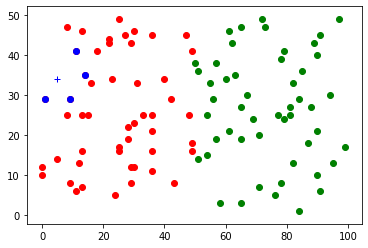

In [28]:
plt.scatter(df["x1"][:50],df["x2"][:50],color="r")
plt.scatter(df["x1"][50:],df["x2"][50:],color="g")
plt.plot(5,34,"b+")
plt.scatter(near_4[:,0],near_4[:,1],color="b")

In [29]:
def knearest_points(p,d,k):
    '''p - new data point
    d - all the features as numpy array
    k - no of neighbors
    returns the k nearest neighbors indices'''
    # create an empty list to store distances
    distances = []
    for row in d:
        distances.append(Eucledian_distance(row,p))
    # convert the list to numpy array
    distances = np.array(distances)
    # sort the numpy array get the indices based on sorted
    # values
    # use the indices to get the k nearest neighbors
    return distances.argsort()[:k]

In [30]:
knearest_points((5,34),features.values,30)

array([ 0, 39, 26, 49, 24, 17, 30, 11,  2, 45, 43, 47, 34, 28, 46, 29, 38,
       13,  3, 42, 37, 44, 33, 40,  6, 12, 31, 35,  5, 48], dtype=int64)

In [31]:
ind = knearest_points((47,25),features.values,10)

In [32]:
features.values[ind]

array([[48, 25],
       [42, 29],
       [54, 25],
       [49, 18],
       [49, 16],
       [56, 29],
       [36, 25],
       [55, 33],
       [40, 34],
       [57, 19]])

In [33]:
outcome[ind]

8     0
14    0
68    1
10    0
4     0
89    1
18    0
52    1
15    0
99    1
Name: y, dtype: int32

In [34]:
outcome[ind].value_counts()

0    6
1    4
Name: y, dtype: int64

In [35]:
outcome[ind].value_counts().index[0]

0

In [36]:
l = [45,67,45,78,43]
l = np.array(l)
l.argsort()

array([4, 0, 2, 1, 3], dtype=int64)

In [37]:
l

array([45, 67, 45, 78, 43])

In [38]:
for row in features.values:
    print(row)
    break

[ 9 29]


In [39]:
near_4 = knearest_points((5,34),features.values,4)

In [40]:
near_4[:,0]

IndexError: too many indices for array

In [ ]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')
plt.plot(5,34,'bo')
plt.scatter(near_4[:,0],near_4[:,1],color='y')

In [ ]:
ind = knearest_points((47,25),features.values,10)
features.values[ind]
outcome[ind]
outcome[ind].value_count()
outcome[ind].value_count().index[0]

In [ ]:
def output(p,k,features,outcome):
    ind = knearest_points(p,features.values,k)
    return outcome[ind].value_counts().index[0]
output((34,49),10,features,outcome)

In [ ]:
df.to_csv("data_knn")